In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ds_train = pd.read_csv("we_data/train.csv")
ds_val = pd.read_csv("we_data/validation.csv")
ds_test = pd.read_csv("we_data/test.csv")

In [3]:
dataset = {
    'train': ds_train,
    'val': ds_val,
    'test': ds_test
}

In [4]:
pd.DataFrame(ds_train['usertag'][22:26])['usertag'].str.get_dummies(sep=',')

10006  10024  10057  10063  10077  10083  10110  10111  13403  13776  \
22      0      0      0      0      0      0      0      0      0      0   
23      1      1      1      1      1      1      1      0      1      0   
24      0      0      0      0      0      0      0      1      0      0   
25      0      0      0      0      0      0      0      0      0      1   

    13866  
22      0  
23      0  
24      1  
25      0

In [5]:
pd.DataFrame(ds_train['usertag'][22:26])

usertag
22                                              NaN
23  10063,13403,10083,10057,10077,10006,10024,10110
24                                      13866,10111
25                                            13776

In [6]:
ds_train.shape

# Number of impressions 2430981

(2430981, 25)

In [7]:
ds_train.describe()

click       weekday          hour        region          city  \
count  2.430981e+06  2.430981e+06  2.430981e+06  2.430981e+06  2.430981e+06   
mean   7.375623e-04  2.888556e+00  1.348925e+01  1.493833e+02  1.543295e+02   
std    2.714809e-02  2.055223e+00  6.567105e+00  1.020631e+02  1.033093e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  1.000000e+00  1.000000e+01  7.900000e+01  7.900000e+01   
50%    0.000000e+00  3.000000e+00  1.400000e+01  1.460000e+02  1.520000e+02   
75%    0.000000e+00  5.000000e+00  1.900000e+01  2.160000e+02  2.220000e+02   
max    1.000000e+00  6.000000e+00  2.300000e+01  3.950000e+02  3.990000e+02   

         adexchange  urlid     slotwidth    slotheight     slotprice  \
count  2.381152e+06    0.0  2.430981e+06  2.430981e+06  2.430981e+06   
mean   2.109685e+00    NaN  5.774218e+02  1.885723e+02  2.671783e+01   
std    8.764370e-01    NaN  3.216738e+02  1.314946e+02  3.704444e+01   
min    1.000000e+00    NaN  1.200000e+02  5.000000e+01  0.000000e+00   
25%    1.000000e+00    NaN  3.000000e+02  9.000000e+01  0.000000e+00   
50%    2.000000e+00    NaN  3.360000e+02  9.000000e+01  5.000000e+00   
75%    3.000000e+00    NaN  9.600000e+02  2.500000e+02  5.000000e+01   
max    4.000000e+00    NaN  1.000000e+03  6.000000e+02  3.000000e+02   

           bidprice      payprice    advertiser  
count  2.430981e+06  2.430981e+06  2.430981e+06  
mean   2.729620e+02  7.815142e+01  2.840736e+03  
std    2.891153e+01  5.984636e+01  7.841990e+02  
min    2.270000e+02  0.000000e+00  1.458000e+03  
25%    2.410000e+02  3.300000e+01  2.259000e+03  
50%    2.940000e+02  6.800000e+01  3.358000e+03  
75%    3.000000e+02  9.900000e+01  3.427000e+03  
max    3.000000e+02  3.000000e+02  3.476000e+03

In [32]:
avg_ctr = ds_train.click.mean() # 0.0007375623
# avgSlotPrice: 26.71783
# avgPayPrice: 78.15142

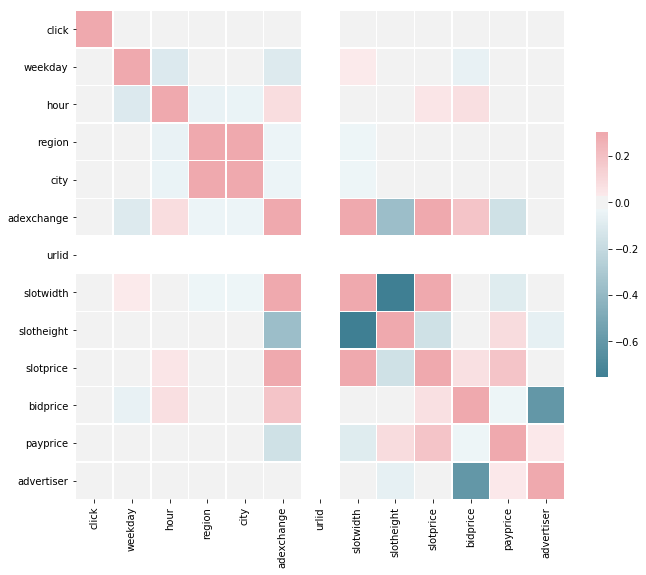

In [8]:
pearson = ds_train.corr(method='pearson')
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pearson, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Useful fields
# 'weekday', 'hour', 'region', 'city', 'slotwidth', 'slotheight', 'slotprice', 'advertiser'

In [9]:
ds_train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [10]:
for col in ds_train.columns:
    print(f'[{col}]')
    for name, df in dataset.items():
        if col in df:
            print(f'{name}: {len(df[col].unique())}')
        else: 
            print(f'{name}: N.A')
    print('')

# Useful fields here: 
# 1. adexchange
# 2. usertag

[click]
train: 2
val: 2
test: N.A

[weekday]
train: 7
val: 7
test: 7

[hour]
train: 24
val: 24
test: 24

[bidid]
train: 2430981
val: 303925
test: 303375

[userid]
train: 2342677
val: 302416
test: 301846

[useragent]
train: 38
val: 35
test: 33

[IP]
train: 503975
val: 194693
test: 194482

[region]
train: 35
val: 35
test: 35

[city]
train: 370
val: 370
test: 370

[adexchange]
train: 5
val: 5
test: 5

[domain]
train: 23013
val: 9290
test: 9239

[url]
train: 763961
val: 136905
test: 136738

[urlid]
train: 1
val: 1
test: 1

[slotid]
train: 52283
val: 15720
test: 15745

[slotwidth]
train: 21
val: 21
test: 21

[slotheight]
train: 14
val: 14
test: 14

[slotvisibility]
train: 11
val: 11
test: 11

[slotformat]
train: 4
val: 4
test: 4

[slotprice]
train: 286
val: 267
test: 258

[creative]
train: 131
val: 129
test: 129

[bidprice]
train: 8
val: 8
test: N.A

[payprice]
train: 301
val: 301
test: N.A

[keypage]
train: 19
val: 19
test: 19

[advertiser]
train: 9
val: 9
test: 9

[usertag]
train: 744036


In [11]:
field = 'advertiser'
ds_train.groupby(field)[[field, 'click']].sum()

advertiser  click
advertiser                   
1458         717850674    385
2259         301967307     43
2261         248985842     36
2821         596263486    131
2997         149337513    217
3358         889722248    202
3386        1540768826    320
3427        1380416162    272
3476        1080462460    187

In [12]:
for name, df in dataset.items():
    tags = set()
    for x in df['usertag']:
        tags.update(str(x).split(','))
    print(f'{name}: {len(tags)}')

train: 69
val: 69
test: 69


In [13]:
# Fix useful null fields (no_necessary since we get_dummies for all of them)
# ds_train.fillna(0, inplace=True)
ds_train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [14]:
def preprocess(data):
    df = data.copy()
    
#     Bin slot price
    bins = [-np.inf, 10, 50, 100, 150, np.inf]
    labels = ['sp_1','sp_2','sp_3','sp_4', 'sp_5']
    df['slotprice'] = pd.cut(df['slotprice'], bins=bins, labels=labels)
    
    # Obtain os and browser from useragent
    os_bow = df['useragent'].str.split('_', n=1, expand=True)
    df['os'] = os_bow[0] 
    df['browser'] = os_bow[1]
    df.drop('useragent', axis=1, inplace=True)
    
    # Keep selected fields
    selected_fields = ['weekday', 'hour', 'region', 'city', 'adexchange', 'slotwidth', 'slotheight', 
                   'slotvisibility', 'slotformat' ,'slotprice', 'keypage', 'advertiser', 'usertag', 
                   'os', 'browser']
    
    if 'click' in df:
        selected_fields.append('click')

    df = df[selected_fields]
    
    # Perform One Hot Encoding for categorical fields
    cat_cols = ['weekday', 'hour', 'region', 'city', 'adexchange', 'slotwidth', 'slotheight', 'slotvisibility',
              'slotformat', 'keypage', 'advertiser', 'os', 'browser', 'slotprice']
    
    df = pd.get_dummies(df, columns=cat_cols)
    
    # Perform One Hot Encoding for 'usertag' field
    df_users = df['usertag'].str.get_dummies(sep=',')
    df.drop('usertag', axis=1, inplace=True)
    df = pd.concat([df, df_users], axis=1)
    
    return df

In [15]:
def downsample(df, rate, random_state):
    if 'click' in df:
        df_click_0 = df[df['click'] == 0]
        df_click_1 = df[df['click'] == 1]
        df_click_0_undersample = df_click_0.sample(frac=rate, random_state=random_state)
        df = pd.concat([df_click_0_undersample, df_click_1], axis=0)
    else:
        df = df.sample(frac=rate)
    
    return df

In [16]:
processed_train_df = preprocess(ds_train)

In [17]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [27]:
downsample_rate = 0.0005
random_state = 42

rates = [0.0005]

for downsample_rate in rates:
    train_df = downsample(processed_train_df, downsample_rate, random_state)
    print('Rate:', downsample_rate)
    print('Shape:', train_df.shape)
    val_df = preprocess(ds_val)
    X_train = train_df.drop('click', axis=1)
    y_train = train_df['click']
    X_test = val_df.drop('click', axis=1)
    y_test = val_df['click']

    logmodel = LogisticRegression(solver='lbfgs', max_iter=1500, random_state=42)
    xgbmodel = XGBClassifier(n_jobs=4, random_state=42)

    models = [('log', logmodel), ('xgb', xgbmodel)]

    for name, model in models:
        model.fit(X_train, y_train)


    for name, model in models:
        y_pred = model.predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)

        print(f'Model: {name}, AUC Score: {roc_auc}')
        print(confusion_matrix(y_test, y_pred))

Rate: 0.0005
Shape: (3008, 606)
Model: log, AUC Score: 0.742406716150917
[[204385  99338]
 [    38    164]]
Model: xgb, AUC Score: 0.7785277527663869
[[224823  78900]
 [    37    165]]


In [20]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [84]:
def get_est_ctr(model, df, downsample_rate):
    bidids = df['bidid']
    if 'click' in df.columns:
        df = df.drop('click', axis=1)
    processed_df = preprocess(df)
    prob = pd.DataFrame(model.predict_proba(processed_df))
    prob['calibratedctr'] = (prob[1] / (prob[1] + ((1 - prob[1]) / downsample_rate)))
    return pd.concat([bidids, prob['calibratedctr']], axis=1)

In [102]:
def check_clicks(df_val, df_bids, budget=6250):
    clicks, imps, budget = -1, -1, budget
    df = df_val[['bidid', 'payprice', 'click']]
    df = pd.merge(df, df_bids, on='bidid')
    df['win'] = (df['bidprice'] - df['payprice']) >= 0
    
    win_df = df[df['win'] == True]
    win_df['payprice'] = win_df['payprice'] / 1000
    
    if win_df['payprice'].sum() <= budget:
        budget -= win_df['payprice'].sum()
        imps = len(win_df)
        clicks = win_df['click'].sum()
          
    return (clicks, imps, budget)

In [103]:
pred_df = get_est_ctr(xgbmodel, ds_val, downsample_rate)


In [109]:
for base_bid in range(120, 150, 1):
    pred_df['bidprice'] = pred_df['calibratedctr'] / avg_ctr * base_bid 
    result = check_clicks(ds_val, pred_df)
    if result[0] == -1:
        break
    print(f'Base Bid: {base_bid}')
    print(f'Clicks: {result[0]}, Imps: {result[1]}, CTR: {result[0]/result[1]}, Leftover: {result[2]}')

/home/boonwenjie/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Base Bid: 120
Clicks: 157, Imps: 131204, CTR: 0.0011966098594555043, Leftover: 451.78299999999945
Base Bid: 121
Clicks: 157, Imps: 132074, CTR: 0.0011887275315353514, Leftover: 395.97799999999916
Base Bid: 122
Clicks: 158, Imps: 132846, CTR: 0.0011893470635171552, Leftover: 343.90999999999894
Base Bid: 123
Clicks: 158, Imps: 133610, CTR: 0.001182546216600554, Leftover: 295.6859999999988
Base Bid: 124
Clicks: 159, Imps: 134340, CTR: 0.0011835640911121036, Leftover: 250.40899999999965
Base Bid: 125
Clicks: 159, Imps: 135191, CTR: 0.00117611379455733, Leftover: 195.52400000000034
Base Bid: 126
Clicks: 159, Imps: 135889, CTR: 0.0011700726328106028, Leftover: 145.59399999999914
Base Bid: 127
Clicks: 159, Imps: 136647, CTR: 0.001163582076445147, Leftover: 94.00099999999838
Base Bid: 128
Clicks: 159, Imps: 137414, CTR: 0.0011570873419011164, Leftover: 44.44200000000001


In [112]:
df = get_est_ctr(xgbmodel, ds_test, downsample_rate)
df['bidprice'] = df['calibratedctr'] / avg_ctr * 128
df[['bidid', 'bidprice']].to_csv('./test_bids.csv', index=False, header=True)